<a href="https://colab.research.google.com/github/srisha-raj/demography-projs/blob/main/Comparative_Fertility_China.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question: To what extent did China's One-Child Policy (1979) cause a drop in Fertility?

### A comparative demography study to Vietnam and South Korea

#### Authored By: Srisha Raj
#### Data Source: World Bank Group, [Fertility rate, total (births per woman)](https://data.worldbank.org/indicator/SP.DYN.TFRT.IN)


## Step 1: LOAD DATA IN

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as plticker


In [8]:
df_raw = pd.read_csv('API_SP.DYN.TFRT.IN_DS2_en_csv_v2_123473.csv', skiprows=4)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_raw.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.56700,4.422000,4.262000,4.107000,3.94000,3.797000,...,1.848000,1.785000,1.732000,1.701000,1.662000,1.631000,1.615000,1.602000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.65033,6.667308,6.688246,6.709226,6.72493,6.737459,...,4.615744,4.569884,4.521443,4.471338,4.412973,4.350683,4.287033,4.223771,NaN,NaN


In [9]:
china_df_raw = df_raw[df_raw["Country Name"] == "China"]
vietnam_df_raw = df_raw[df_raw["Country Name"] == "Viet Nam"]
south_korea_df_raw = df_raw[df_raw["Country Name"] == "Korea, Rep."]
south_korea_df_raw.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
126,"Korea, Rep.",KOR,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,5.994,5.803,5.562,5.334,5.068,4.887,...,1.172,1.052,0.977,0.918,0.837,0.808,0.778,0.721,NaN,NaN


For time series data, **.melt** is used to unpivot a table so that we can get all the years as one variable!

In this case, we want a column where it's just 'Year' and the corresponding Value would be 'Total Fertility Rate'.



In [10]:
china_df = china_df_raw.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
        var_name="Year",
        value_name="Total Fertility Rate").dropna(subset=["Total Fertility Rate"])

vietnam_df = vietnam_df_raw.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
        var_name="Year",
        value_name="Total Fertility Rate").dropna(subset=["Total Fertility Rate"])


south_korea_df = south_korea_df_raw.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
        var_name="Year",
        value_name="Total Fertility Rate").dropna(subset=["Total Fertility Rate"])

In [19]:
china_df["Year"] = china_df["Year"].astype(int)
vietnam_df["Year"] = vietnam_df["Year"].astype(int)
south_korea_df["Year"] = south_korea_df["Year"].astype(int)


In [20]:
dataset = pd.concat([china_df, vietnam_df, south_korea_df], ignore_index=True)

In [22]:
dataset.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Total Fertility Rate
0,China,CHN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,4.451
1,China,CHN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1961,3.863
2,China,CHN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1962,6.085
3,China,CHN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1963,7.513
4,China,CHN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1964,6.672
5,China,CHN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1965,6.605
6,China,CHN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1966,6.307
7,China,CHN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1967,5.806
8,China,CHN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1968,6.508
9,China,CHN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1969,6.175


In [23]:
dataset.to_csv("fertility_rates.csv", index=False)

# Step 2: Exploratory Data Analysis

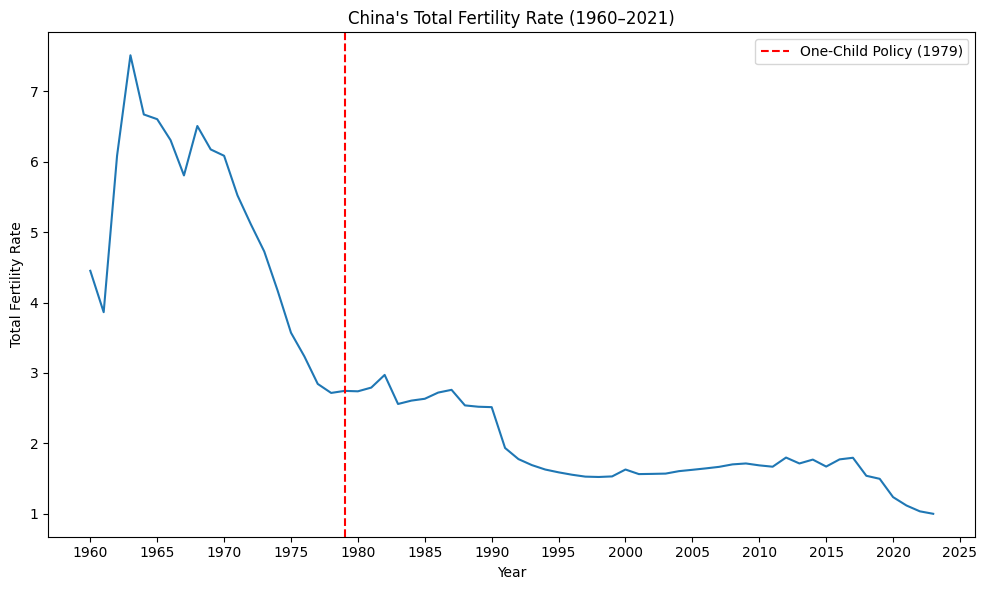

In [24]:
# @title China: Year vs Total Fertility Rate

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=china_df, x="Year", y="Total Fertility Rate")

plt.axvline(x=1979, color='red', linestyle='--', label='One-Child Policy (1979)')
loc = plticker.MultipleLocator(base=5)
ax.xaxis.set_major_locator(loc)



plt.title('China\'s Total Fertility Rate (1960–2021)')
plt.xlabel('Year')
plt.ylabel('Total Fertility Rate')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-25-1697624439.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


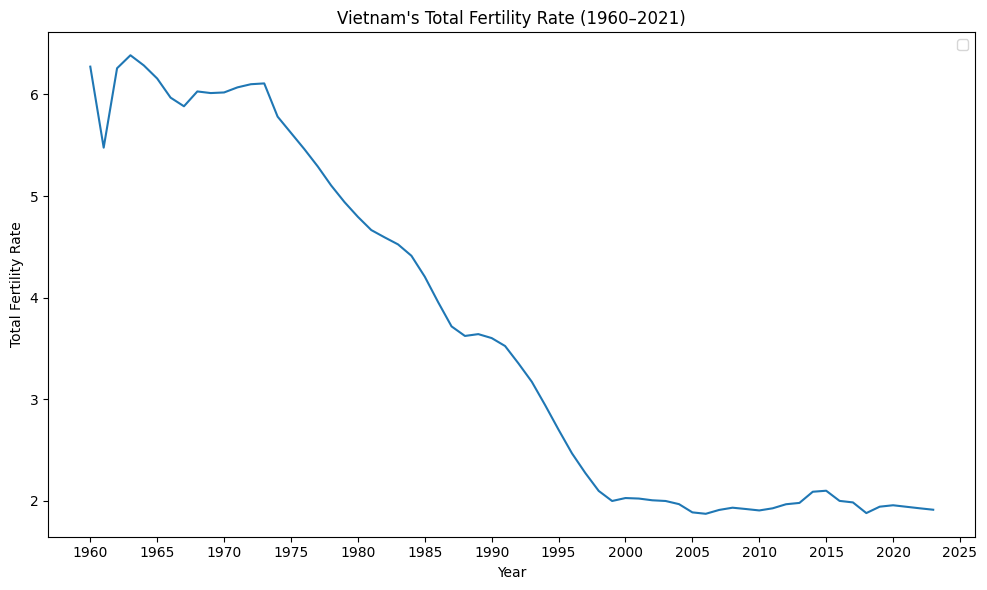

In [25]:
# @title Vietnam: Year vs Total Fertility Rate

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=vietnam_df, x="Year", y="Total Fertility Rate")

loc = plticker.MultipleLocator(base=5)
ax.xaxis.set_major_locator(loc)



plt.title('Vietnam\'s Total Fertility Rate (1960–2021)')
plt.xlabel('Year')
plt.ylabel('Total Fertility Rate')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-26-1431204253.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


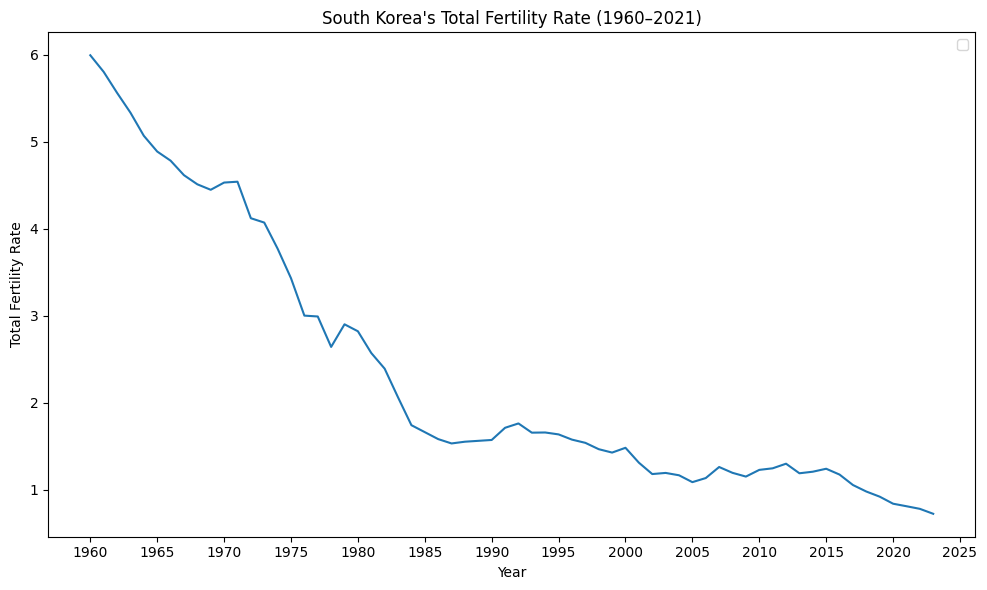

In [26]:
# @title South Korea: Year vs Total Fertility Rate

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=south_korea_df, x="Year", y="Total Fertility Rate")

loc = plticker.MultipleLocator(base=5)
ax.xaxis.set_major_locator(loc)



plt.title('South Korea\'s Total Fertility Rate (1960–2021)')
plt.xlabel('Year')
plt.ylabel('Total Fertility Rate')
plt.legend()
plt.tight_layout()
plt.show()

## Side-by-Side Line Plot: China vs. Vietnam vs. South Korea

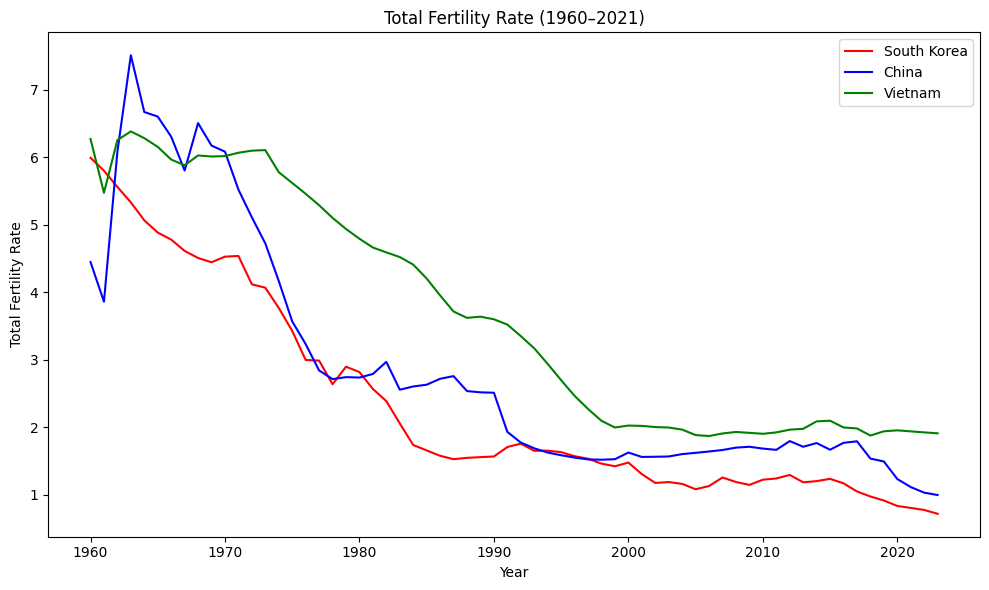

In [32]:
plt.figure(figsize=(10, 6))

loc = plticker.MultipleLocator(base=10)
ax = plt.gca()

sns.lineplot(data=south_korea_df, x="Year", y="Total Fertility Rate", ax=ax, label='South Korea', color='red')
sns.lineplot(data=china_df, x="Year", y="Total Fertility Rate", ax=ax, label='China', color='blue')
sns.lineplot(data=vietnam_df, x="Year", y="Total Fertility Rate", ax=ax, label='Vietnam', color='green')

ax.xaxis.set_major_locator(loc)
plt.title("Total Fertility Rate (1960–2021)")
plt.xlabel("Year")
plt.ylabel("Total Fertility Rate")


plt.legend()
plt.tight_layout()
plt.show()

#Step 3: OLS Regression Model for DiD (Differences in Differences)




In [ ]:
import statsmodels.api as sm
#Both Time Series trends looks like exponential decay, so use log transformation for OLS

In [ ]:
#china_df_USE for simpler OLS model
china_df_USE = china_df[["Country Name", "Year","Total Fertility Rate"]]
vietnam_df_USE = vietnam_df[["Country Name", "Year","Total Fertility Rate"]]
south_korea_df_USE = south_korea_df[["Country Name", "Year","Total Fertility Rate"]]
vietnam_df_USE.head(4)

,Country Name,Year,Total Fertility Rate
0,Viet Nam,1960,6.273
1,Viet Nam,1961,5.476
2,Viet Nam,1962,6.257
3,Viet Nam,1963,6.385


# DiD Variable Definitions - Experiment 1:


*   TREATMENT: Whether Country is China (1) or Vietnam (0)
*   POST: Pre or Post Policy (1979)
*   DiD: Interaction Term based on if policy has been enacted in China

In [ ]:
combined_df_v = pd.concat([china_df_USE, vietnam_df_USE], ignore_index=True).sort_values(by="Year").set_index("Year").reset_index()
combined_df_v["log_Fertility"] = np.log(combined_df_v["Total Fertility Rate"])
combined_df_v.head(4)

,Year,Country Name,Total Fertility Rate,log_Fertility
0,1960,China,4.451,1.493129
1,1960,Viet Nam,6.273,1.836255
2,1961,Viet Nam,5.476,1.700375
3,1961,China,3.863,1.351444


# Assessing Linear Fit for OLS model

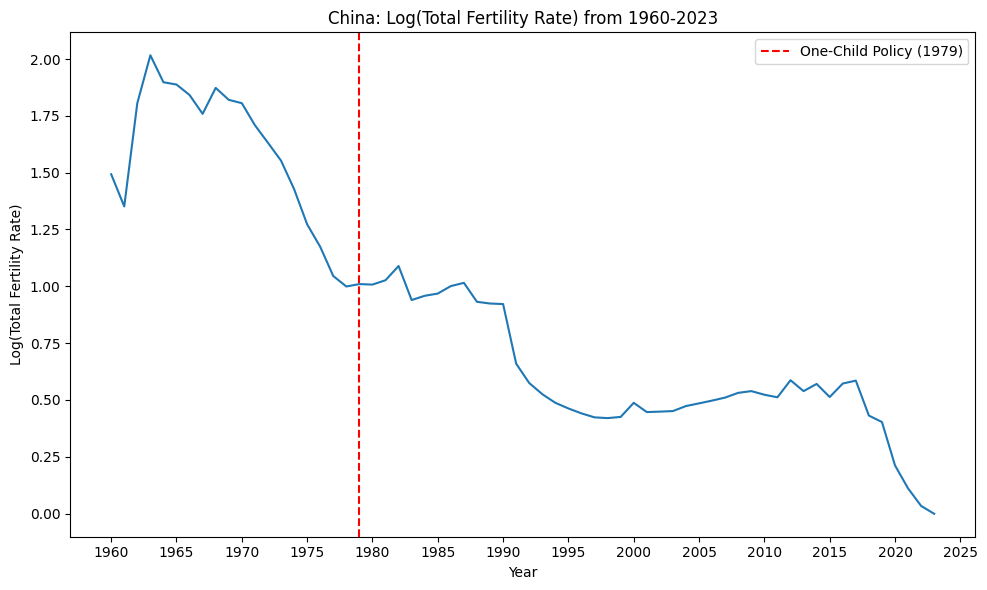

In [ ]:
# @title China: Year vs Log(Total Fertility Rate)

plt.figure(figsize=(10, 6))
combined_df_china = combined_df_v[combined_df_v["Country Name"] == "China"]
ax = sns.lineplot(data=combined_df_china, x="Year", y="log_Fertility")

plt.axvline(x=1979, color='red', linestyle='--', label='One-Child Policy (1979)')
loc = plticker.MultipleLocator(base=5)
ax.xaxis.set_major_locator(loc)



plt.title('China: Log(Total Fertility Rate) from 1960-2023')
plt.xlabel('Year')
plt.ylabel('Log(Total Fertility Rate)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Treatment: 1 if China, 0 if Vietnam
combined_df_v["Treatment"] = combined_df_v["Country Name"].apply(lambda x: 1 if x == "China" else 0)

# Post: 1 if year >= 1979
combined_df_v["Post"] = combined_df_v["Year"].apply(lambda x: 1 if x >= 1979 else 0)

# DiD: interaction term
combined_df_v["DiD"] = combined_df_v["Treatment"] * combined_df_v["Post"]

combined_df_v.head(4)

,Year,Country Name,Total Fertility Rate,log_Fertility,Treatment,Post,DiD
0,1960,China,4.451,1.493129,1,0,0
1,1960,Viet Nam,6.273,1.836255,0,0,0
2,1961,Viet Nam,5.476,1.700375,0,0,0
3,1961,China,3.863,1.351444,1,0,0


In [ ]:
X = combined_df_v[["Treatment", "Post", "DiD"]]
X = sm.add_constant(X)
y = combined_df_v["log_Fertility"]

model_v = sm.OLS(y, X).fit()
print(model_v.summary())

                            OLS Regression Results                            
Dep. Variable:          log_Fertility   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     103.9
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           1.13e-33
Time:                        00:42:41   Log-Likelihood:                -19.776
No. Observations:                 128   AIC:                             47.55
Df Residuals:                     124   BIC:                             58.96
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7747      0.066     26.962      0.0

# DiD Variable Definitions - Experiment 2:


*   TREATMENT: Whether Country is China (1) or South Korea (0)
*   POST: Pre or Post Policy (1979)
*   DiD: Interaction Term based on if policy has been enacted in China

In [ ]:
combined_df_sk = pd.concat([china_df_USE, south_korea_df_USE], ignore_index=True).sort_values(by="Year").set_index("Year").reset_index()
combined_df_sk["log_Fertility"] = np.log(combined_df_sk["Total Fertility Rate"])
combined_df_sk.head(4)

# Treatment: 1 if China, 0 if South Korea
combined_df_sk["Treatment"] = combined_df_sk["Country Name"].apply(lambda x: 1 if x == "China" else 0)

# Post: 1 if year >= 1979
combined_df_sk["Post"] = combined_df_sk["Year"].apply(lambda x: 1 if x >= 1979 else 0)

# DiD: interaction term
combined_df_sk["DiD"] = combined_df_sk["Treatment"] * combined_df_sk["Post"]

combined_df_sk.head(4)

,Year,Country Name,Total Fertility Rate,log_Fertility,Treatment,Post,DiD
0,1960,China,4.451,1.493129,1,0,0
1,1960,"Korea, Rep.",5.994,1.790759,0,0,0
2,1961,"Korea, Rep.",5.803,1.758375,0,0,0
3,1961,China,3.863,1.351444,1,0,0


In [ ]:
X = combined_df_sk[["Treatment", "Post", "DiD"]]
X = sm.add_constant(X)
y = combined_df_sk["log_Fertility"]

model_sk = sm.OLS(y, X).fit()
print(model_sk.summary())

                            OLS Regression Results                            
Dep. Variable:          log_Fertility   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     132.2
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           1.85e-38
Time:                        00:42:59   Log-Likelihood:                -19.847
No. Observations:                 128   AIC:                             47.69
Df Residuals:                     124   BIC:                             59.10
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4636      0.066     22.223      0.0